### Homework - Building a Neural Net with Keras - due April 1 (optional)

#### You job is to follow the instructions on pages 297-307 in the book to build an image classification neural network that classifies Fashion MNIST - a very popular dataset that contains black and white images of clothing items.

### You must include:

- Well commented code for each step in the process - following the book
- After each code block, output, or graph and clear explaination about what is going on, why the parameter choices were made, and what the outputs are telling you. Some example questions you should address as you go: 

** Why do you need to separate out a validation set? 
** What is the structure of the neural net model? 
** What do all the things in model.summary() mean? 
** How many parameters do you need to find? 
** How would you see the initializaion of weights in the second hidden layer? 
** Does it make sense to initalize the bias terms to zero? 
** Do the shapes of the weights and biases make sense for each layer? 
** What loss, optimizer, and metric are you using? 
** What is your learning rate? 
** What does the plot of the training history tell you? 
** What is the accuracy of your first image classification model? 
** How do you do with predictions? 
** Can you find one that you get wrong?


- At the end, please play around with some of the parameters: What if you add or subtract layers? What if you decrease or increase the number of neurons? What if you change the number of epochs? What if you train more or change your learning rate? Can you make your model preform better than the first time? You can say in words what your best run was or just leave your best run in the notebook you submit and talk about what you tried.


- Finally, explore the extensive online documentation for Keras: https://keras.io/. Here you will find more information that you could ever use, but if you choose to continue advancing in machine learning and keras, this website will be very helpful!
- Try things like keras.layers.(press tab) to see all the layer options and keras.activations.(press tab) to see activations possible. This is all part of exploring the possibilities.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Check tensor flow version: I have 2.0.0 installed

tf.__version__

'2.0.0'

In [3]:
# Check keras version: I have 2.2.4-tf instsalled
keras.__version__

'2.2.4-tf'

In [4]:
# To plot pretty figures - run this cell
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np
import pandas as pd

In [5]:
# Import Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

# Load the data which is already split into testing and training sets by MNIST
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The data is split into training and testing sets.  However, there is not a validation set.  The model will train on the training set, and the testing set is used to asses how well the model was trained.  We need a validation set which the machine has never seen before to do paramter tuning.  We also need to scale our data, since we're dealing with images it would be impractical to use `StandardScaler` (I think?), so we divide each pixel by 255.0 to get them on a range of 0-1. 

In [6]:
# Split into training and validation
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0 # scaliing paramter is 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Now that the data is scaled and a validation set is created, we can look at our images.

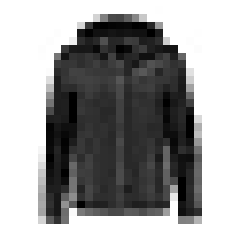

In [7]:
# Use the command below to look at some of the training images
image_num = 0 # num corresponding to images
plt.imshow(X_train[image_num], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
# What is the form of the y data? What are the possible values? What do the values mean?


It is important to know the class codes for each image.  This can be achieved through defining `class_names` with all the images we can get from MNIST.

In [9]:
# Define the class names and then print the class name form the first few pictures in X_test
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Now that `class_names` is defined, we can find the name of image 0.

In [10]:
# we can check the name of the image too
class_names[y_train[0]]

'Coat'

If we want to see a sample of the images from our training data set we can run the cell below.  

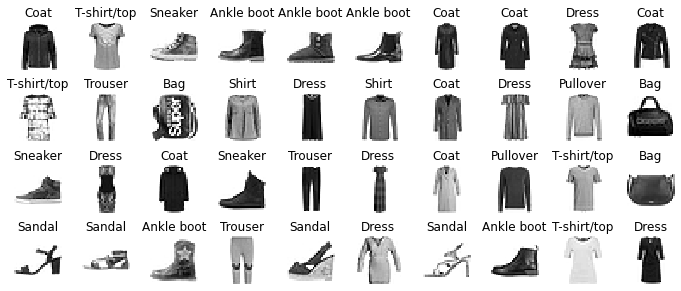

In [11]:
# Take a look at some of the items in the data set - run the cell and comment on what it does
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

To build the network we will use a classification MLP with two hidden layers. \

- `model = keras.models.Sequential()` creates a Sequential model which is composed of a single stack of layers connxted sequentially

- `model.add(keras.layers.Flatten(input_shape = [28,28]))` this is the first layer in our model.  It will convert each input image into a 1D array.  If it gets input data X then it computes X.reshape(-1,1).

- `model.add(keras.layers.Dense(300, activation = "relu"))` is a dense layer with 300 neurons using the "ReLU" activation.

- `model.add(keras.layers.Dense(100, activation = "relu"))` is a dense layer of 100 neurons.

- `model.add(keras.layers.Dense(10, activation = "softmax"))` is a dense layer of 10 neurons using a softmax activation function since the classes are exclusive

In [12]:
# Build the architecture of the Neural Net
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

To look at all the model's layers we can use the `model.summary()` command which will print each layer type, output shape, and it's number of parameters.  More nuerons in the layer, the more parameters the layer will have. 

In [13]:
# Look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Explore the initialization of the weights and biases = theta values 
model.layers

In [15]:
hidden1 = model.layers[1]
print(hidden1.name)
model.get_layer('dense') is hidden1

weights, biases = hidden1.get_weights()


dense


In [16]:
print(weights)
print(weights.shape)

[[ 0.04768987  0.05134252 -0.07424934 ... -0.04373389  0.01387458
  -0.01918713]
 [ 0.03599894  0.03292066  0.05852133 ...  0.04401939 -0.01010151
  -0.03960196]
 [-0.04702903  0.06160948 -0.04631208 ...  0.06890415  0.06516846
   0.06084566]
 ...
 [ 0.06078079 -0.04435608  0.04513395 ...  0.05487767  0.02942414
  -0.06226196]
 [ 0.01805571  0.06789537 -0.0114162  ... -0.03415704  0.02350917
   0.00241984]
 [ 0.06312299 -0.0047143   0.00569268 ...  0.00044768 -0.06553628
  -0.02732999]]
(784, 300)


In [17]:
print(biases)
print(biases.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300,)


Now that the model has been created, we can use the `compile()` function.  We need to input the loss function and the optimizer to use.  `metric` is optional but we will use "accuracy" so look at how well our model is performing.  Because we have spares labels we want to use "sparse_categorical_crossentropy".  The optimizer of "sgd" is Stochastic Gradient Descent.

In [18]:
# Now compile the model:
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = "sgd",
             metrics = ["accuracy"])

In [19]:
# Give the model our training and validation data for training - this takes a bit of time to run
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.7078 - accuracy: 0.7668 - val_loss: 0.5060 - val_accuracy: 0.8276
Epoch 2/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.4880 - accuracy: 0.8297 - val_loss: 0.4574 - val_accuracy: 0.8414
Epoch 3/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.4449 - accuracy: 0.8431 - val_loss: 0.4214 - val_accuracy: 0.8534
Epoch 4/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.4179 - accuracy: 0.8525 - val_loss: 0.3961 - val_accuracy: 0.8616
Epoch 5/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.3992 - accuracy: 0.8611 - val_loss: 0.4039 - val_accuracy: 0.8598
Epoch 6/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.3824 - accuracy: 0.8644 - val_loss: 0.3691 - val_accuracy: 0.8716
Epoch 7/30
55000/55000 [==============================] -

What is contained in history dictionary?
- `History` is an object containing the training paramters the list of epochs, and the loss and extra metrics that were measured.

In [20]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [21]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [22]:
history.history

{'loss': [0.7078469228094274,
  0.48802001092217184,
  0.44487759768746116,
  0.4179308190172369,
  0.39917908574017613,
  0.38237542688629844,
  0.36935321112546055,
  0.3576635768326846,
  0.34737457465692,
  0.33877870557091455,
  0.32840088758902114,
  0.3207323830756274,
  0.31315184760527176,
  0.30563272010413084,
  0.3000422810576179,
  0.29324271894585,
  0.2876240095008503,
  0.2823736645308408,
  0.2765526939023625,
  0.2713061006611044,
  0.2658314320206642,
  0.2616495361024683,
  0.25688727205449885,
  0.25187207403833217,
  0.24739456522248007,
  0.24325788026072762,
  0.23890375652963464,
  0.2354598640322685,
  0.2319825235150077,
  0.22768996984200043],
 'accuracy': [0.76681817,
  0.8296546,
  0.8430909,
  0.85254544,
  0.8610727,
  0.8644,
  0.8705636,
  0.8734909,
  0.8763273,
  0.87978184,
  0.88296366,
  0.88625455,
  0.88823634,
  0.8900545,
  0.89198184,
  0.8956,
  0.89623636,
  0.89845455,
  0.90067273,
  0.9018546,
  0.90456367,
  0.9054545,
  0.90745455,
  0

We can look at the learning curves by plotting the training history.

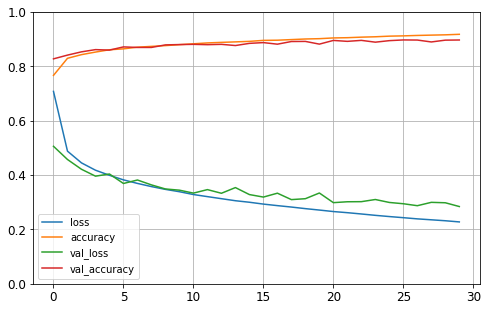

In [23]:
# Plot the training history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Using the `evaluate` function we can check the accuracy of the model

In [24]:
# Check the accuracy of the model
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[60.13965208535194, 0.8503]

In [50]:
# Make some predictions (use images from the test set) and check the predictions with the real image
X_new = X_test[20:30]
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
# Can you find one it got wrong and show it. 
# Your answer might be different if you compare with friends, depending on training and random states
y_pred = model.predict_classes(X_new)
y_pred

array([2, 5, 7, 9, 1, 2, 6, 0, 9, 4], dtype=int64)

In [52]:
np.array(class_names)[y_pred]

array(['Pullover', 'Sandal', 'Sneaker', 'Ankle boot', 'Trouser',
       'Pullover', 'Shirt', 'T-shirt/top', 'Ankle boot', 'Coat'],
      dtype='<U11')

In [53]:
y_new = y_test[20:30]
y_new

array([2, 5, 7, 9, 1, 4, 6, 0, 9, 3], dtype=uint8)

In [54]:
np.array(class_names)[y_new]

array(['Pullover', 'Sandal', 'Sneaker', 'Ankle boot', 'Trouser', 'Coat',
       'Shirt', 'T-shirt/top', 'Ankle boot', 'Dress'], dtype='<U11')

I can compare the arrays I get from `y_pred` and `y_new` to see if there are any mis-predicted images.  
- y_pred: array([2, 5, 7, 9, 1, 2, 6, 0, 9, 4], dtype=int64)
- y_new: array([2, 5, 7, 9, 1, 4, 6, 0, 9, 3], dtype=uint8) \

We see a few differences in this range of `20:30`, where a 2 (pullover) was supposed to be a 4 (coat) and a 4 (coat) was supposed to be a 3 (dress).  All the shapes of the coat and dresses are pretty similar so I would not be suprised if the majority of inaccuracies were from these type of clothing.